In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
import plotly.express as px
import math
import os
from tqdm import tqdm

from sklearn import metrics, model_selection
from sklearn.preprocessing import scale, normalize
from sklearn import datasets, cluster
from sklearn import neighbors, ensemble, tree, linear_model
from xgboost import XGBClassifier

import warnings
warnings.filterwarnings('ignore')

### Check balanced accuracy with complete test data

In [6]:
! wget https://raw.githubusercontent.com/cosbidev/COVIDCXRChallenge/main/docs/submission_1.txt

--2022-03-24 18:02:26--  https://raw.githubusercontent.com/cosbidev/COVIDCXRChallenge/main/docs/submission_1.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 8540 (8.3K) [text/plain]
Saving to: ‘submission_1.txt.1’

submission_1.txt.1  100%[===================>]   8.34K  --.-KB/s    in 0s      

2022-03-24 18:02:26 (34.4 MB/s) - ‘submission_1.txt.1’ saved [8540/8540]



In [3]:
# submission by the COSBI team
df_result_cosbi = pd.read_csv('./submission_1.txt', header=None)

# submission by rtrain of COSBI model by Andris
df_result_cosbi_retrain = pd.read_csv('./reports_andris_retrain1/submission_cosbi_retest.csv', delimiter='\t', header=[0])

# submission by using all COSBI weights
df_result_all_cosbi_weights = pd.read_csv('./reports_andris_retrain1/submission_cosbi_all_weights_fromtheir_training.csv', delimiter='\t', header=[0])

# submission by using all COSBI weights for different models
df_result_all_cosbi_weights_all_models = pd.read_csv('./reports_andris_retrain1/submission_cosbi_all_weights_from_their_training.csv', delimiter='\t', header=[0])

# submission by using all COSBI weights from retraining
df_result_all_cosbi_weights_all_models_retraining = pd.read_csv('./reports_andris_retrain1/submission_cosbi_all_weights_from_retraining.csv', delimiter='\t', header=[0])

In [10]:
! wget https://ai4covid-hackathon.it/static/index/completeTestClinData.xls

--2022-03-24 18:06:28--  https://ai4covid-hackathon.it/static/index/completeTestClinData.xls
Resolving ai4covid-hackathon.it (ai4covid-hackathon.it)... 155.185.49.176
Connecting to ai4covid-hackathon.it (ai4covid-hackathon.it)|155.185.49.176|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 185344 (181K) [application/vnd.ms-excel]
Saving to: ‘completeTestClinData.xls’

completeTestClinDat 100%[===================>] 181.00K  --.-KB/s    in 0.07s   

2022-03-24 18:06:28 (2.55 MB/s) - ‘completeTestClinData.xls’ saved [185344/185344]



In [33]:
# full test set
df_complete_test = pd.read_excel('./completeTestClinData.xls')

## Checks

In [5]:
print('Balanced Accuracy on COSBIE submission:')
metrics.balanced_accuracy_score(y_true=df_complete_test['Prognosis'], y_pred=df_result_cosbi[1])

Balanced Accuracy on COSBIE submission:


0.911437908496732

### Downloaded weights Andris

In [8]:
print('Balanced Accuracy COSBIE VGG weights:')
metrics.balanced_accuracy_score(y_true=df_complete_test['Prognosis'].apply(lambda x: 0 if x =='MILD' else 1), y_pred=df_result_all_cosbi_weights_all_models['vgg11_bn'])

Balanced Accuracy COSBIE VGG weights:


0.5529411764705883

In [9]:
print('Balanced Accuracy COSBIE DENSENET weights:')
metrics.balanced_accuracy_score(y_true=df_complete_test['Prognosis'].apply(lambda x: 0 if x =='MILD' else 1), y_pred=df_result_all_cosbi_weights_all_models['densenet121'])

Balanced Accuracy COSBIE DENSENET weights:


0.5674836601307189

In [10]:
print('Balanced Accuracy COSBIE MLP weights:')
metrics.balanced_accuracy_score(y_true=df_complete_test['Prognosis'].apply(lambda x: 0 if x =='MILD' else 1), y_pred=df_result_all_cosbi_weights_all_models['mlp_1'])

Balanced Accuracy COSBIE MLP weights:


0.6803921568627451

In [35]:
print('Balanced Accuracy with final COSBIE downlaoded weights:')
metrics.balanced_accuracy_score(y_true=df_complete_test['Prognosis'].apply(lambda x: 0 if x =='MILD' else 1), y_pred=df_result_all_cosbi_weights['Prognosis'])

Balanced Accuracy with final COSBIE downlaoded weights:


0.6702614379084967

### retraining from Andris

In [13]:
print('Balanced Accuracy retraining VGG weights:')
metrics.balanced_accuracy_score(y_true=df_complete_test['Prognosis'].apply(lambda x: 0 if x =='MILD' else 1), y_pred=df_result_all_cosbi_weights_all_models_retraining['vgg11_bn'])

Balanced Accuracy retraining VGG weights:


0.6433006535947712

In [14]:
print('Balanced Accuracy retraining DENSENET weights:')
metrics.balanced_accuracy_score(y_true=df_complete_test['Prognosis'].apply(lambda x: 0 if x =='MILD' else 1), y_pred=df_result_all_cosbi_weights_all_models_retraining['densenet121'])

Balanced Accuracy retraining DENSENET weights:


0.6436274509803921

In [15]:
print('Balanced Accuracy retraining MLP weights:')
metrics.balanced_accuracy_score(y_true=df_complete_test['Prognosis'].apply(lambda x: 0 if x =='MILD' else 1), y_pred=df_result_all_cosbi_weights_all_models_retraining['mlp_1'])

Balanced Accuracy retraining MLP weights:


0.6803921568627451

In [16]:
print('Balanced Accuracy retraining final weights:')
metrics.balanced_accuracy_score(y_true=df_complete_test['Prognosis'].apply(lambda x: 0 if x =='MILD' else 1), y_pred=df_result_all_cosbi_weights_all_models_retraining['densenet121;vgg11_bn;mlp_1'])

Balanced Accuracy retraining final weights:


0.6761437908496732

### retraining from Zsolt

In [18]:
df_result_all_cosbi_weights_image_models_retraining_zsolt = pd.read_excel('reports_zsolt_retrain1/img/tables/prediction/prediction_submission.xlsx')

In [19]:
print('Balanced Accuracy retraining VGG weights:')
metrics.balanced_accuracy_score(y_true=df_complete_test['Prognosis'].apply(lambda x: 0 if x =='MILD' else 1), y_pred=df_result_all_cosbi_weights_image_models_retraining_zsolt['vgg11_bn'])

Balanced Accuracy retraining VGG weights:


0.6238562091503268

In [20]:
print('Balanced Accuracy retraining DENSENET weights:')
metrics.balanced_accuracy_score(y_true=df_complete_test['Prognosis'].apply(lambda x: 0 if x =='MILD' else 1), y_pred=df_result_all_cosbi_weights_image_models_retraining_zsolt['densenet121'])

Balanced Accuracy retraining DENSENET weights:


0.6272875816993464

In [21]:
df_result_all_cosbi_weights_mlp_model_retraining_zsolt = pd.read_excel('reports_zsolt_retrain1/clinical/tables/prediction/prediction_submission.xlsx')

In [22]:
df_result_all_cosbi_weights_joint_model_retraining_zsolt = pd.read_excel('reports_zsolt_retrain1/multimodal/tables/prediction/prediction_submission.xlsx')

In [23]:
print('Balanced Accuracy retraining MLP weights:')
metrics.balanced_accuracy_score(y_true=df_complete_test['Prognosis'].apply(lambda x: 0 if x =='MILD' else 1), y_pred=df_result_all_cosbi_weights_mlp_model_retraining_zsolt['mlp_1'])

Balanced Accuracy retraining MLP weights:


0.6390522875816993

In [24]:
print('Balanced Accuracy retraining final weights:')
metrics.balanced_accuracy_score(y_true=df_complete_test['Prognosis'].apply(lambda x: 0 if x =='MILD' else 1), y_pred=df_result_all_cosbi_weights_joint_model_retraining_zsolt['densenet121;vgg11_bn;mlp_1'])

Balanced Accuracy retraining final weights:


0.6630718954248366

### retraining 2 from Zsolt

In [25]:
df_result_all_cosbi_weights_image_models_retraining2_zsolt = pd.read_excel('reports_zsolt_retrain2/img/tables/prediction/prediction_submission.xlsx')

In [26]:
print('Balanced Accuracy retraining VGG weights:')
metrics.balanced_accuracy_score(y_true=df_complete_test['Prognosis'].apply(lambda x: 0 if x =='MILD' else 1), y_pred=df_result_all_cosbi_weights_image_models_retraining2_zsolt['vgg11_bn'])

Balanced Accuracy retraining VGG weights:


0.4826797385620915

In [27]:
print('Balanced Accuracy retraining DENSENET weights:')
metrics.balanced_accuracy_score(y_true=df_complete_test['Prognosis'].apply(lambda x: 0 if x =='MILD' else 1), y_pred=df_result_all_cosbi_weights_image_models_retraining2_zsolt['densenet121'])

Balanced Accuracy retraining DENSENET weights:


0.6838235294117647

In [29]:
df_result_all_cosbi_weights_mlp_model_retraining2_zsolt = pd.read_excel('reports_zsolt_retrain2/clinical/tables/prediction/prediction_submission.xlsx')

In [30]:
df_result_all_cosbi_weights_joint_model_retraining2_zsolt = pd.read_excel('reports_zsolt_retrain2/multimodal/tables/prediction/prediction_submission.xlsx')

In [31]:
print('Balanced Accuracy retraining MLP weights:')
metrics.balanced_accuracy_score(y_true=df_complete_test['Prognosis'].apply(lambda x: 0 if x =='MILD' else 1), y_pred=df_result_all_cosbi_weights_mlp_model_retraining2_zsolt['mlp_1'])

Balanced Accuracy retraining MLP weights:


0.6390522875816993

In [32]:
print('Balanced Accuracy retraining final weights:')
metrics.balanced_accuracy_score(y_true=df_complete_test['Prognosis'].apply(lambda x: 0 if x =='MILD' else 1), y_pred=df_result_all_cosbi_weights_joint_model_retraining2_zsolt['densenet121;vgg11_bn;mlp_1'])

Balanced Accuracy retraining final weights:


0.6838235294117647

### Train classical models on complete clinical train data and evaluate on complete test data

In [122]:
# load the pop average imputed test data
df_test = pd.read_csv('../data/preprocessed_data/tables/pop_avg/testClinDataImputedPopAvg.csv')

In [123]:
# load the pop average imputed train data
df_train = pd.read_csv('../data/preprocessed_data/tables/pop_avg/trainClinDataImputedPopAvg.csv')

In [124]:
# full test set
df_complete_test = pd.read_excel('./completeTestClinData.xls')

In [145]:
rf     = ensemble.RandomForestClassifier(random_state=42)
gb    = ensemble.GradientBoostingClassifier(random_state=42)
dt     = tree.DecisionTreeClassifier(random_state=42)
lr     = linear_model.LogisticRegression(random_state=42)
knn    = neighbors.KNeighborsClassifier(5)
xgb    = XGBClassifier(n_estimators=50, max_depth=3, objective='binary:logistic', use_label_encoder=False)

In [126]:
cols_top_drop = ['Death', 'ImageFile']
df_train.drop(cols_top_drop, axis=1, inplace=True)
df_test.drop(cols_top_drop, axis=1, inplace=True)

df_train['Prognosis'] = df_train['Prognosis'].apply(lambda x: 0 if x =='MILD' else 1)
df_test['Prognosis'] = df_test['Prognosis'].apply(lambda x: 0 if x =='MILD' else 1)

df_complete_test['Prognosis'] = df_complete_test['Prognosis'].apply(lambda x: 0 if x =='MILD' else 1)

In [161]:
model_name = []
ba_score = []

for idx, model in enumerate([rf, gb, dt, lr, knn, xgb]):
    
    model.fit(df_complete_train.drop('Prognosis', axis=1), df_complete_train['Prognosis'])
    
    preds = model.predict(df_test.drop('Prognosis', axis=1))
    
    model_name.append(str(model).partition('(')[0])
    
    ba_score.append(np.round(metrics.balanced_accuracy_score(y_true=df_complete_test['Prognosis'], y_pred=preds) ,3))

[14:46:56] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


Text(0, 0.5, 'Balanced Accuracy Score')

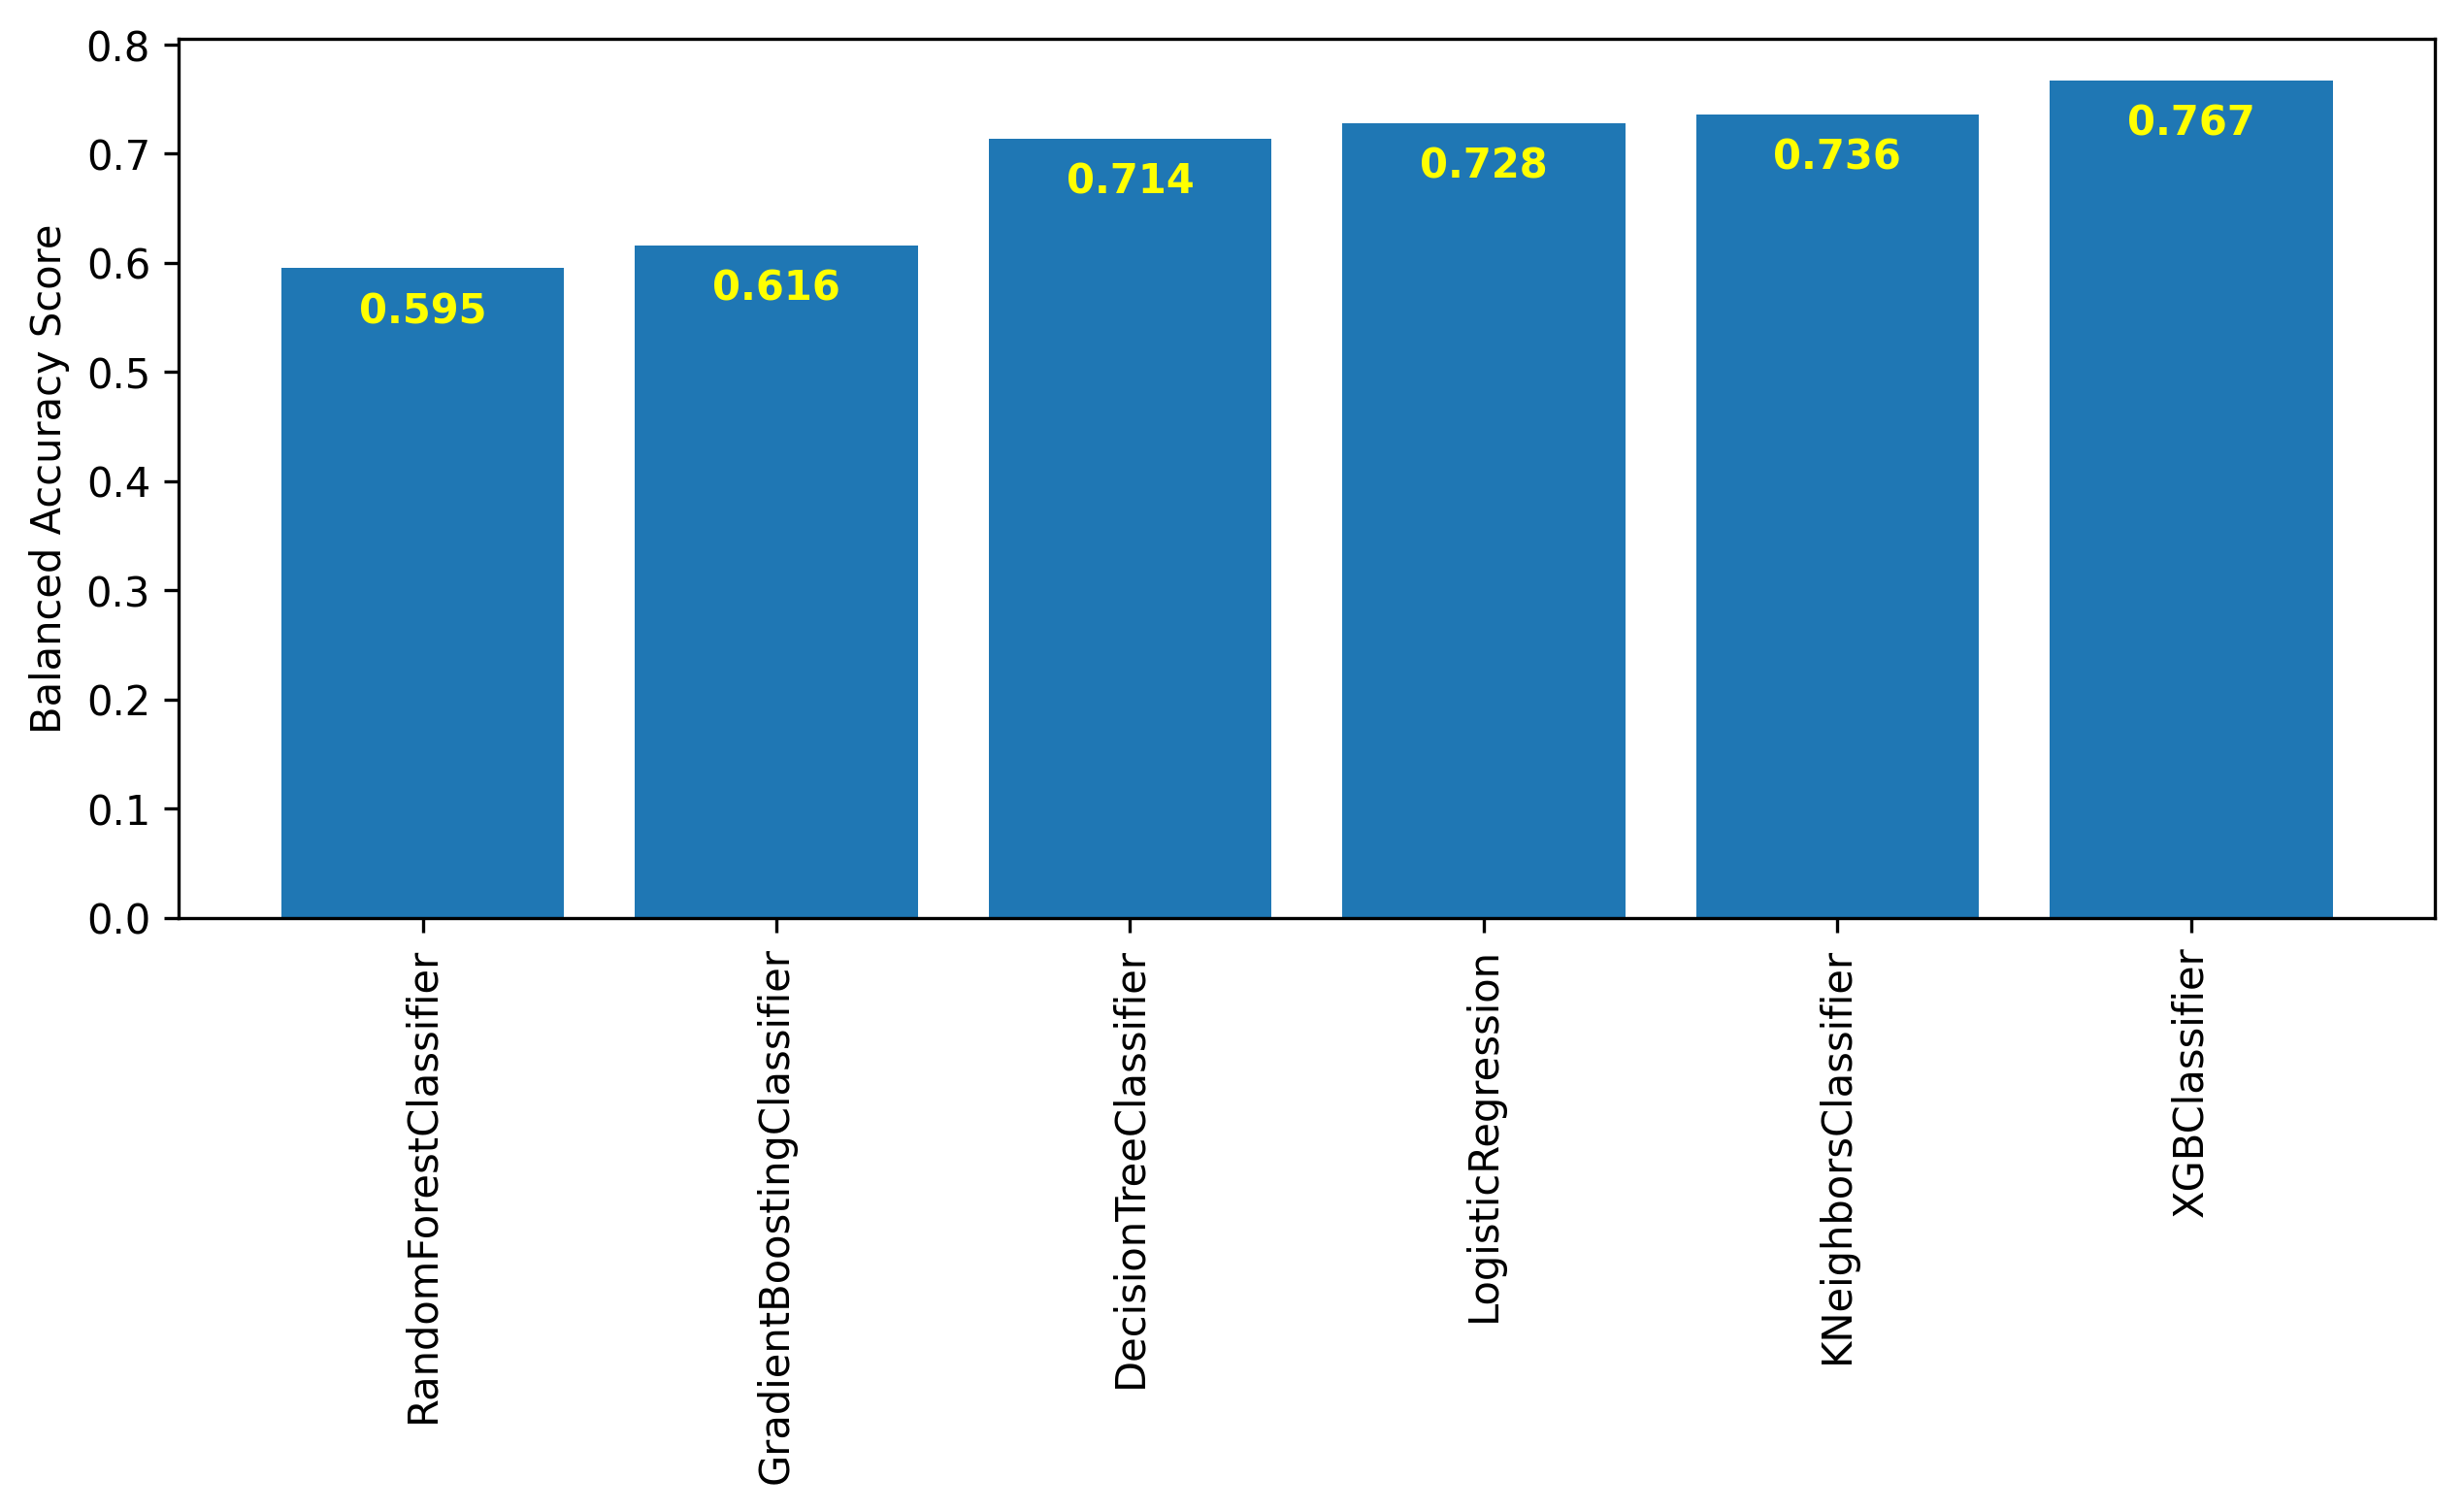

In [264]:
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i]-0.05, y[i], ha = 'center', c='yellow', fontsize=10, fontweight='bold')

fig, ax = plt.subplots(figsize=(10,4), dpi=300)
bp = ax.bar(x=np.array(model_name)[np.array(ba_score).argsort()], height=np.array(ba_score)[np.array(ba_score).argsort()])
plt.xticks(range(len(model_name)), model_name, rotation=90)
addlabels(np.array(model_name)[np.array(ba_score).argsort()], np.array(ba_score)[np.array(ba_score).argsort()])
plt.yticks(fontsize=10)
plt.xticks(fontsize=10)
plt.ylabel('Balanced Accuracy Score')